In [170]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
def state(x_0, v_0, h, t_0, t):
    x = x_0
    v = v_0
    for i in range(0, int(t / h)):
        v_i = v
        v = v - h * x
        x = x + h * v_i
    return [x, v]

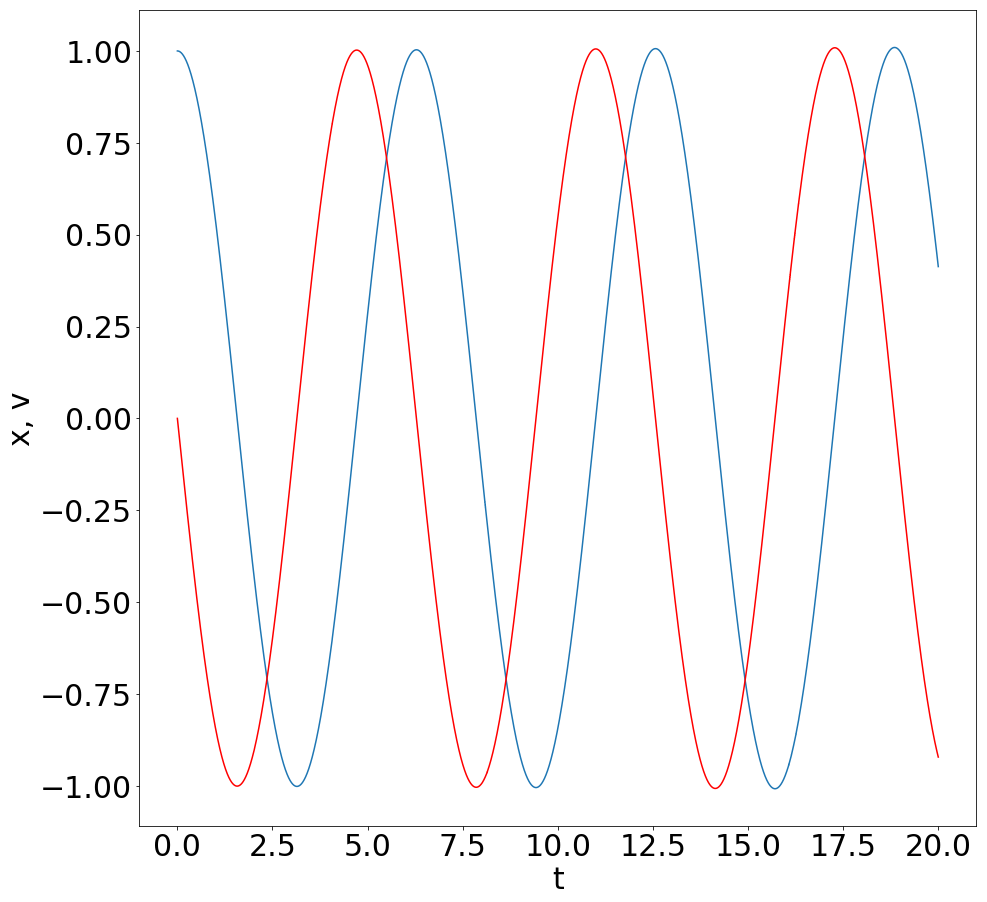

In [308]:
plt.figure(figsize=(15,15))
t = []
x = []
v = []
h = .001
for i in range(0, 20000):
    t.append(i * h)
    x.append(state(1, 0, h, 0, t[i])[0])
    v.append(state(1, 0, h, 0, t[i])[1])
plt.plot(t,x)
plt.plot(t,v,color='red')
plt.xlabel('t')
plt.ylabel('x, v')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

In [309]:
def trueState(x_0, v_0, h, t_0, t):
    x = (x_0) * np.cos(t) + (v_0) * np.sin(t)
    v = -(x_0) * np.sin(t) + (v_0) * np.cos(t)
    return [x, v]

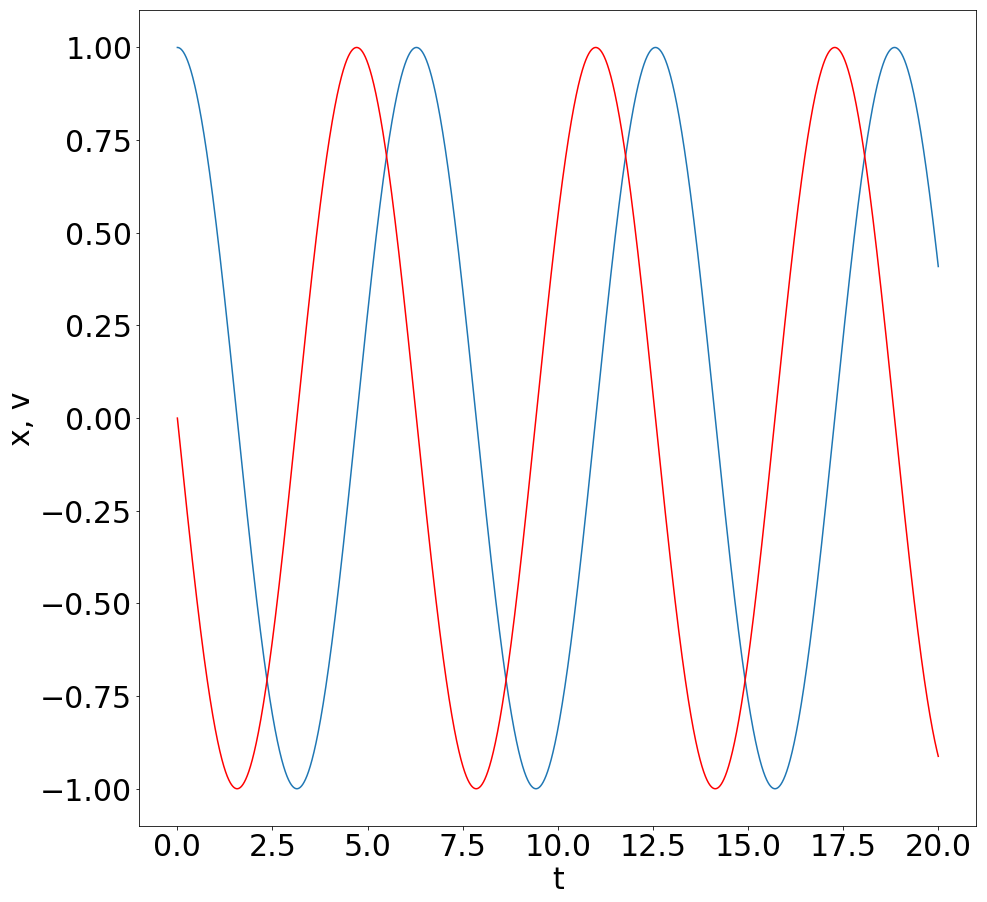

In [310]:
plt.figure(figsize=(15,15))
x_true = []
v_true = []
t = []
h = .001
for i in range(0, 20000):
    t.append(i * h)
    x_true.append(trueState(1, 0, h, 0, t[i])[0])
    v_true.append(trueState(1, 0, h, 0, t[i])[1])
plt.plot(t,x_true)
plt.plot(t,v_true,color='red')
plt.xlabel('t')
plt.ylabel('x, v')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

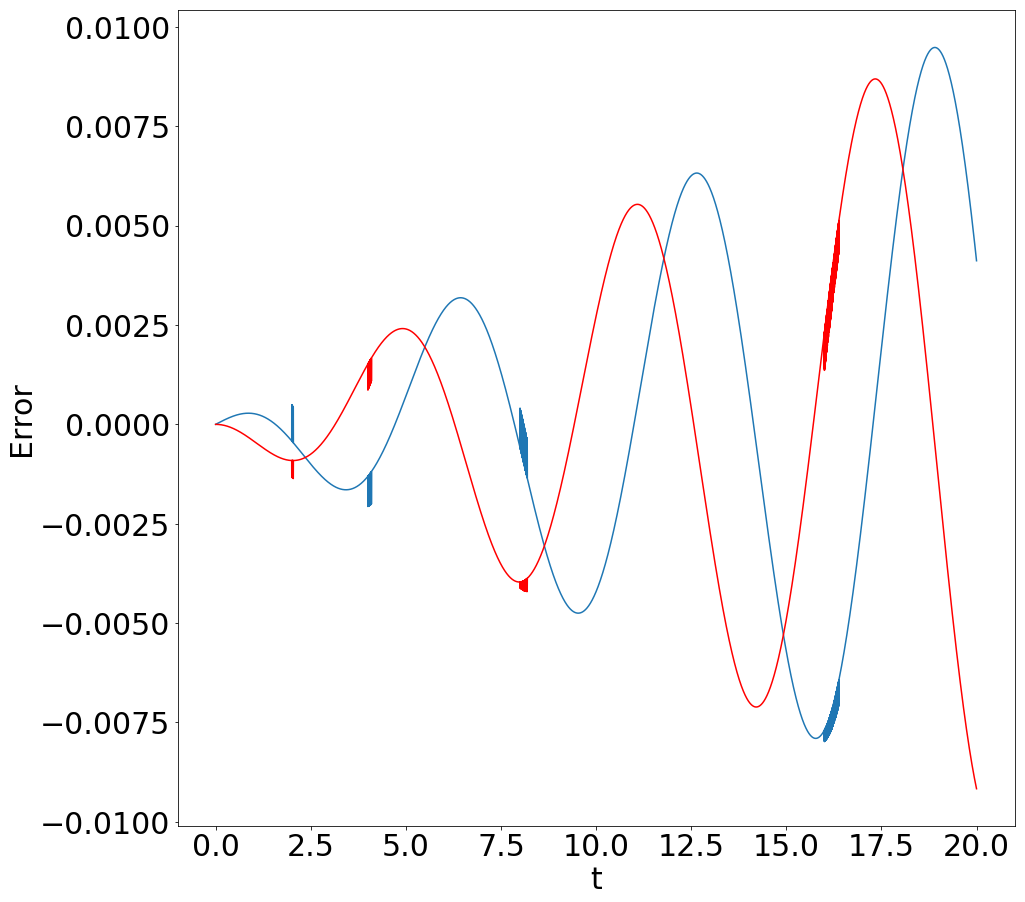

In [311]:
plt.figure(figsize=(15,15))
x_diff = []
v_diff = []
for i in range(0, 20000):
    x_diff.append(x[i] - x_true[i])
    v_diff.append(v[i] - v_true[i])
plt.plot(t,x_diff)
plt.plot(t,v_diff,color='red')
plt.xlabel('t')
plt.ylabel('Error')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

In [176]:
def maxList(l):
    m = l[0]
    for i in range(0, len(l)):
        if l[i] > m:
            m = l[i]
    return m

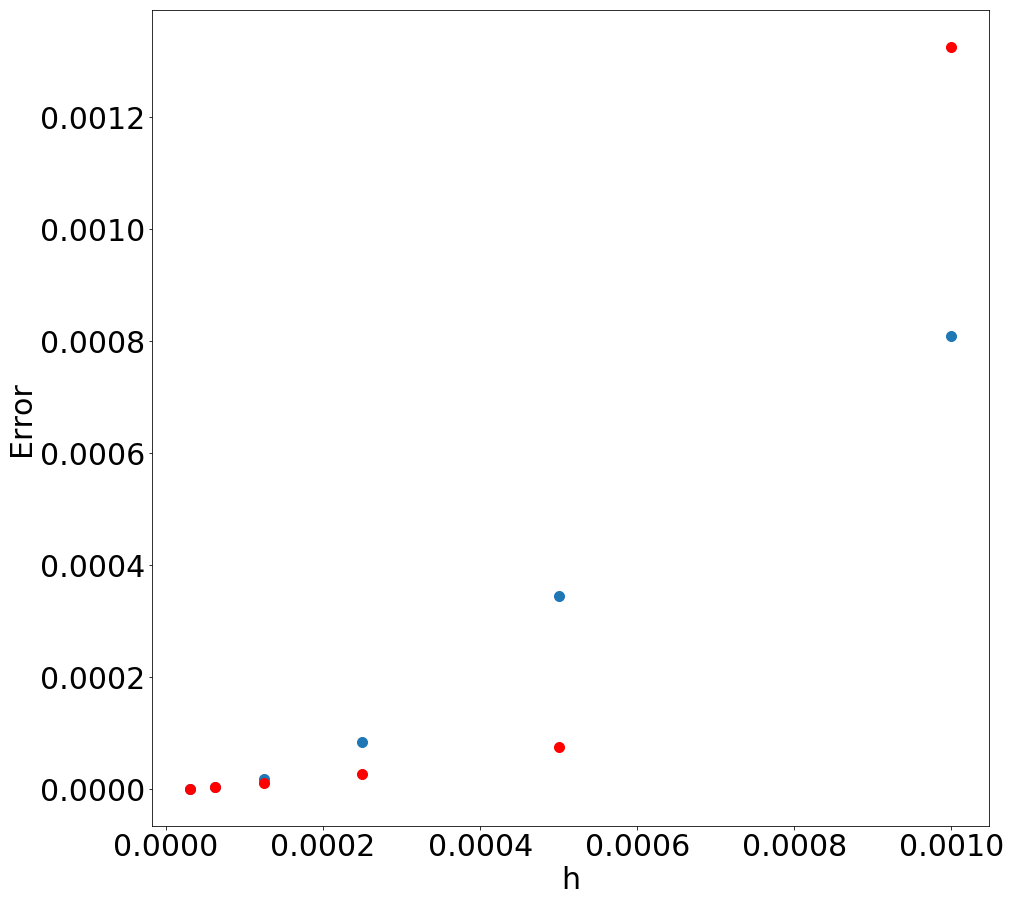

In [334]:
plt.figure(figsize=(15,15))
x_diff_max = []
v_diff_max = []
hArr = []
h_0 = .001
for j in range(0, 6):
    h = h_0 * (2** (-j))
    t = []
    x = []
    v = []
    x_true = []
    v_true = []
    x_diff = []
    v_diff = []
    for i in range(0, 2000):
        t.append(i * h)
        x.append(state(1, 1, h, 0, t[i])[0])
        v.append(state(1, 1, h, 0, t[i])[1])
        x_true.append(trueState(1, 1, h, 0, t[i])[0])
        v_true.append(trueState(1, 1, h, 0, t[i])[1])
        x_diff.append(np.abs(x[i] - x_true[i]))
        v_diff.append(np.abs(v[i] - v_true[i]))
    x_diff_max.append(max(x_diff))
    v_diff_max.append(max(v_diff))
    hArr.append(h)
plt.plot(hArr,x_diff_max, 'o', markersize = 10)
plt.plot(hArr,v_diff_max, 'o', color='red', markersize = 10)

plt.xlabel('h')
plt.ylabel('Error')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

In [182]:
def E(x_0, v_0, h, t_0, t, state, trueState):
    state = state(x_0, v_0, h, t_0, t)
    trueState = trueState(x_0, v_0, h, t_0, t)
    E = state[0] ** 2 + state[1] ** 2
    E_true = trueState[0] ** 2 + trueState[1] ** 2
    return [E, E_true]

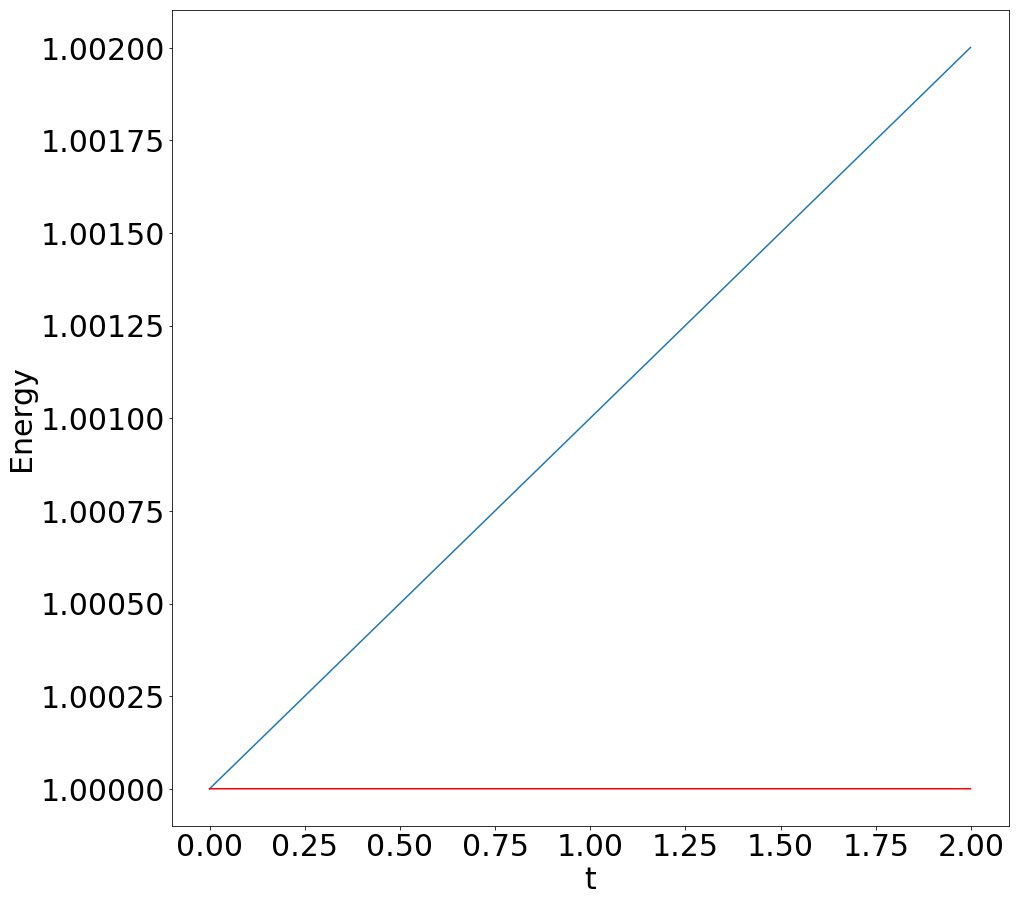

In [313]:
plt.figure(figsize=(15,15))
E_list = []
E_true_list = []
t = []
h = .001
for i in range(0, 2000):
    t.append(i * h)
    E_list.append(E(1, 0, h, 0, t[i], state, trueState)[0])
    E_true_list.append(E(1, 0, h, 0, t[i], state, trueState)[1])
plt.plot(t, E_list)
plt.plot(t, E_true_list , color='red')
plt.xlabel('t')
plt.ylabel('Energy')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

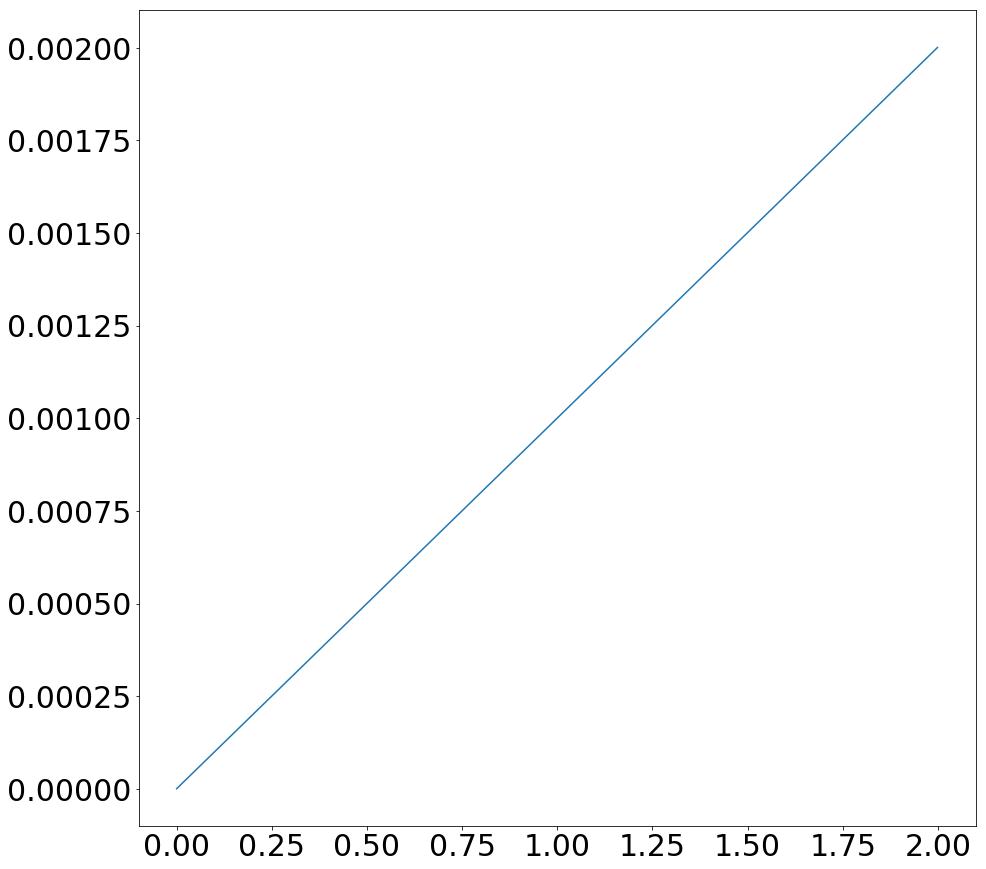

In [184]:
plt.figure(figsize=(15,15))
deltaE = []
h = .001
for i in range(0, 2000):
    deltaE.append(E_list[i] - E_true_list[i])
plt.plot(t, deltaE)

In [233]:
def implicitState(x_0, v_0, h, t_0, t):
    x_i = x_0
    v_i = v_0
    x_i1 = x_0
    v_i1 = v_0
    for i in range(0, int(t / h)):
        v_i = v_i1
        x_i = x_i1
        v_temp = v_i
        v_i1 = v_i - h * x_i
        x_i1 = x_i + h * v_temp
        x_i1 = x_i + h * v_i1
        v_i1 = -h * x_i1 + v_i
    return [x_i1, v_i1]

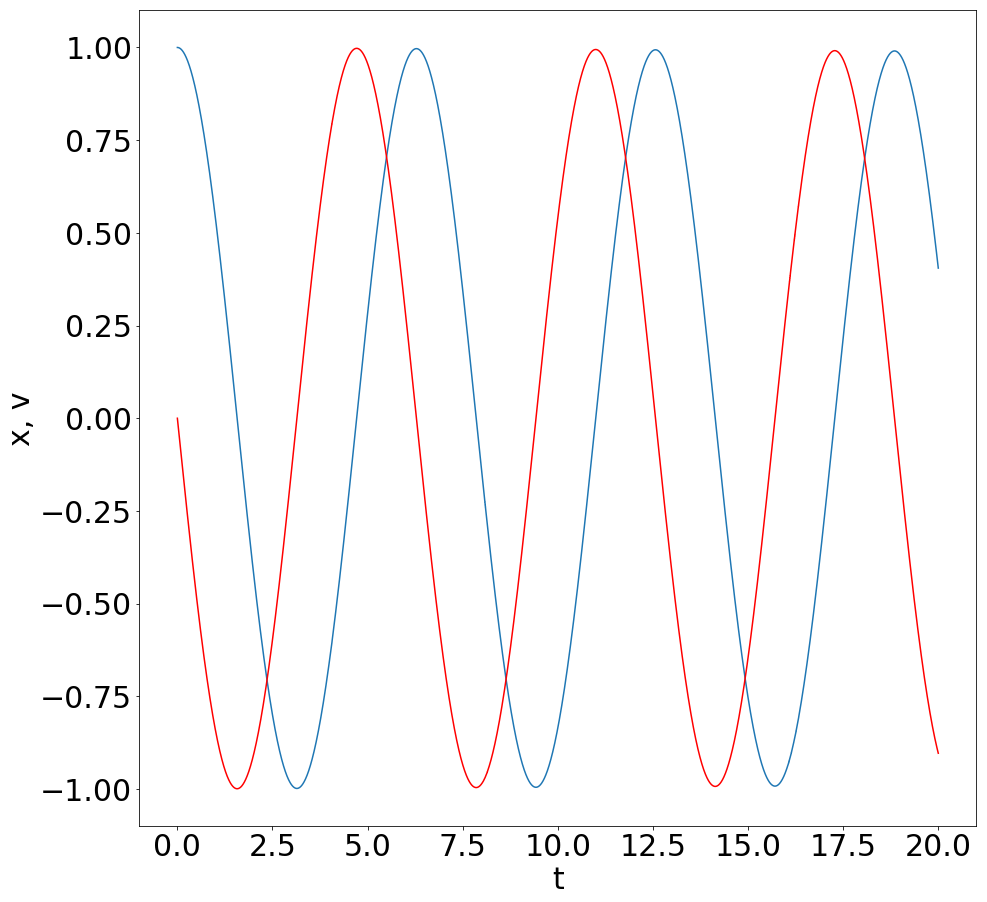

In [315]:
plt.figure(figsize=(15,15))
t = []
x_imp = []
v_imp = []
h = .001
for i in range(0, 20000):
    t.append(i * h)
    x_imp.append(implicitState(1, 0, h, 0, t[i])[0])
    v_imp.append(implicitState(1, 0, h, 0, t[i])[1])
plt.plot(t,x_imp)
plt.plot(t,v_imp,color='red')
plt.xlabel('t')
plt.ylabel('x, v')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)
#Save!

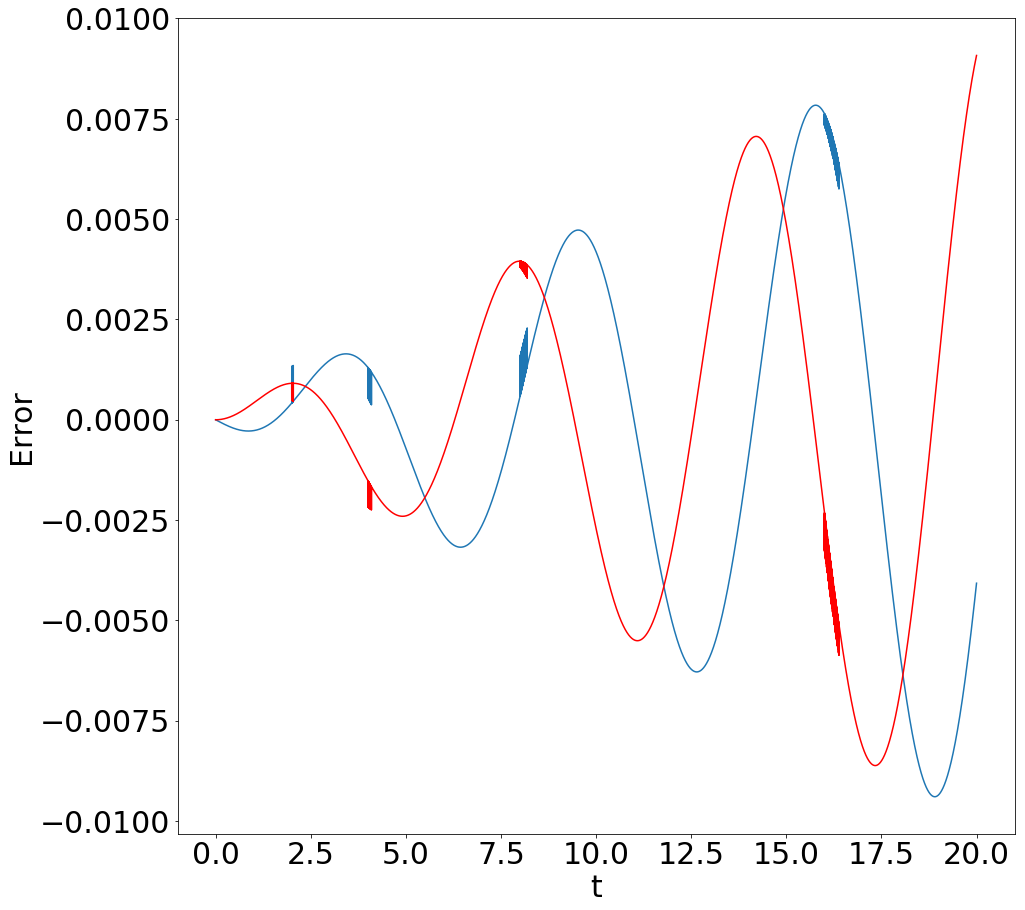

In [316]:
x_true = []
v_true = []
plt.figure(figsize=(15,15))
x_diff2 = []
v_diff2 = []
for i in range(0, 20000):
    x_true.append(trueState(1, 0, h, 0, t[i])[0])
    v_true.append(trueState(1, 0, h, 0, t[i])[1])
    x_diff2.append(x_imp[i] - x_true[i])
    v_diff2.append(v_imp[i] - v_true[i])
plt.plot(t, x_diff2)
plt.plot(t, v_diff2, color='red')
plt.xlabel('t')
plt.ylabel('Error')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

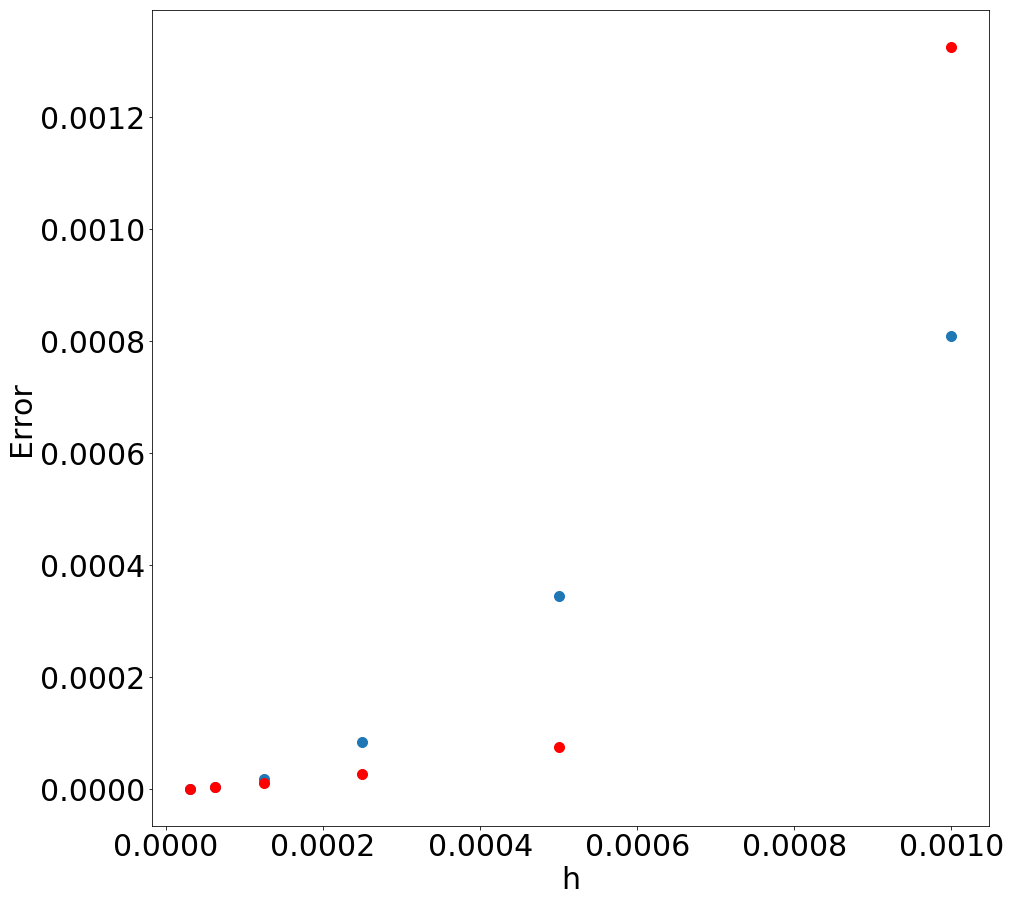

In [335]:
plt.figure(figsize=(15,15))
x_diff_max = []
v_diff_max = []
hArr = []
h_0 = .001
for j in range(0, 6):
    h = h_0 * (2** (-j))
    t = []
    x_imp = []
    v_imp = []
    x_true = []
    v_true = []
    x_diff = []
    v_diff = []
    for i in range(0, 2000):
        t.append(i * h)
        x_imp.append(implicitState(1, 1, h, 0, t[i])[0])
        v_imp.append(implicitState(1, 1, h, 0, t[i])[1])
        x_true.append(trueState(1, 1, h, 0, t[i])[0])
        v_true.append(trueState(1, 1, h, 0, t[i])[1])
        x_diff.append(np.abs(x_imp[i] - x_true[i]))
        v_diff.append(np.abs(v_imp[i] - v_true[i]))
    x_diff_max.append(max(x_diff))
    v_diff_max.append(max(v_diff))
    hArr.append(h)
plt.plot(hArr,x_diff_max, 'o', markersize = 10)
plt.plot(hArr,v_diff_max, 'o', color='red', markersize = 10)

plt.xlabel('h')
plt.ylabel('Error')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

In [305]:
def E_imp(x_0, v_0, h, t_0, t, implicitState, trueState):
    implicitState = implicitState(x_0, v_0, h, t_0, t)
    trueState = trueState(x_0, v_0, h, t_0, t)
    E_imp = implicitState[0] ** 2 + implicitState[1] ** 2
    E_true = trueState[0] ** 2 + trueState[1] ** 2
    return [E_imp, E_true]

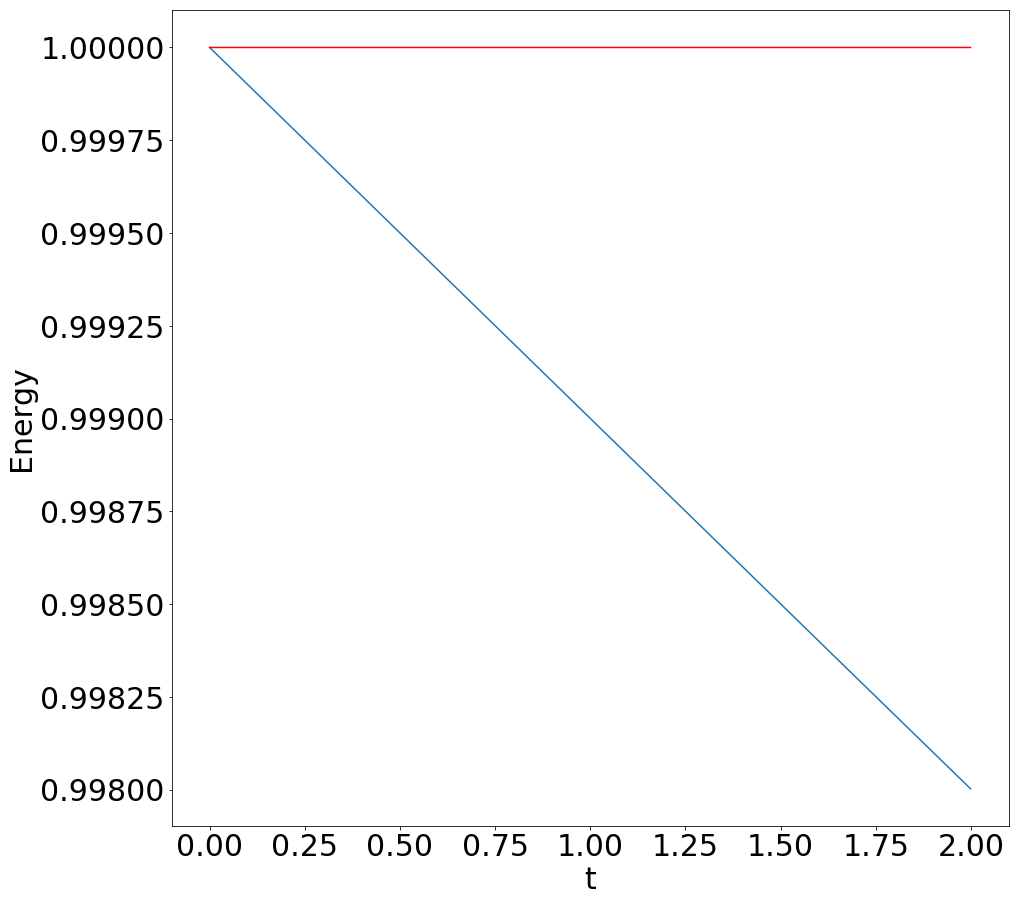

In [317]:
plt.figure(figsize=(15,15))
E_list_imp = []
E_true_list = []
t = []
h = .001
for i in range(0, 2000):
    t.append(i * h)
    E_list_imp.append(E_imp(1, 0, h, 0, t[i], implicitState, trueState)[0])
    E_true_list.append(E_imp(1, 0, h, 0, t[i], implicitState, trueState)[1])
plt.plot(t, E_list_imp)
plt.plot(t, E_true_list , color='red')
plt.xlabel('t')
plt.ylabel('Energy')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

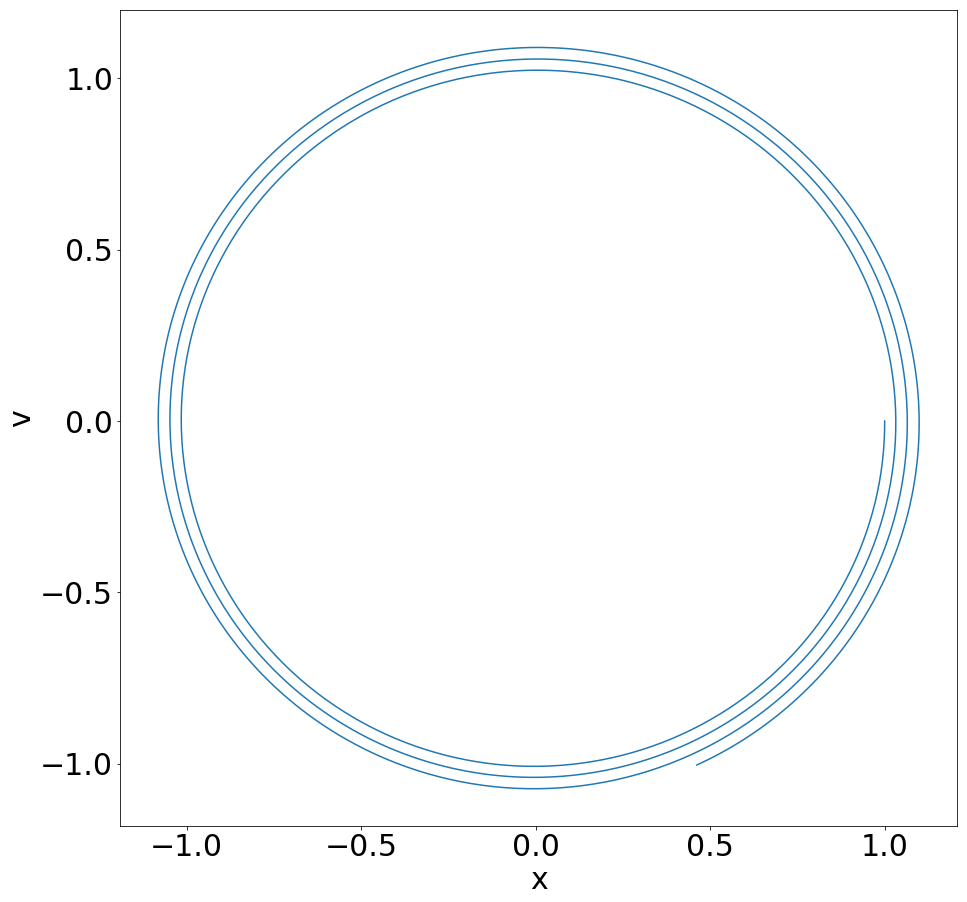

In [318]:
plt.figure(figsize=(15,15))
t = []
x = []
v = []
h = .01
for i in range(0, 2000):
    t.append(i * h)
    x.append(state(1, 0, h, 0, t[i])[0])
    v.append(state(1, 0, h, 0, t[i])[1])
plt.plot(x,v)
plt.xlabel('x')
plt.ylabel('v')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)
#Explicit Euler method

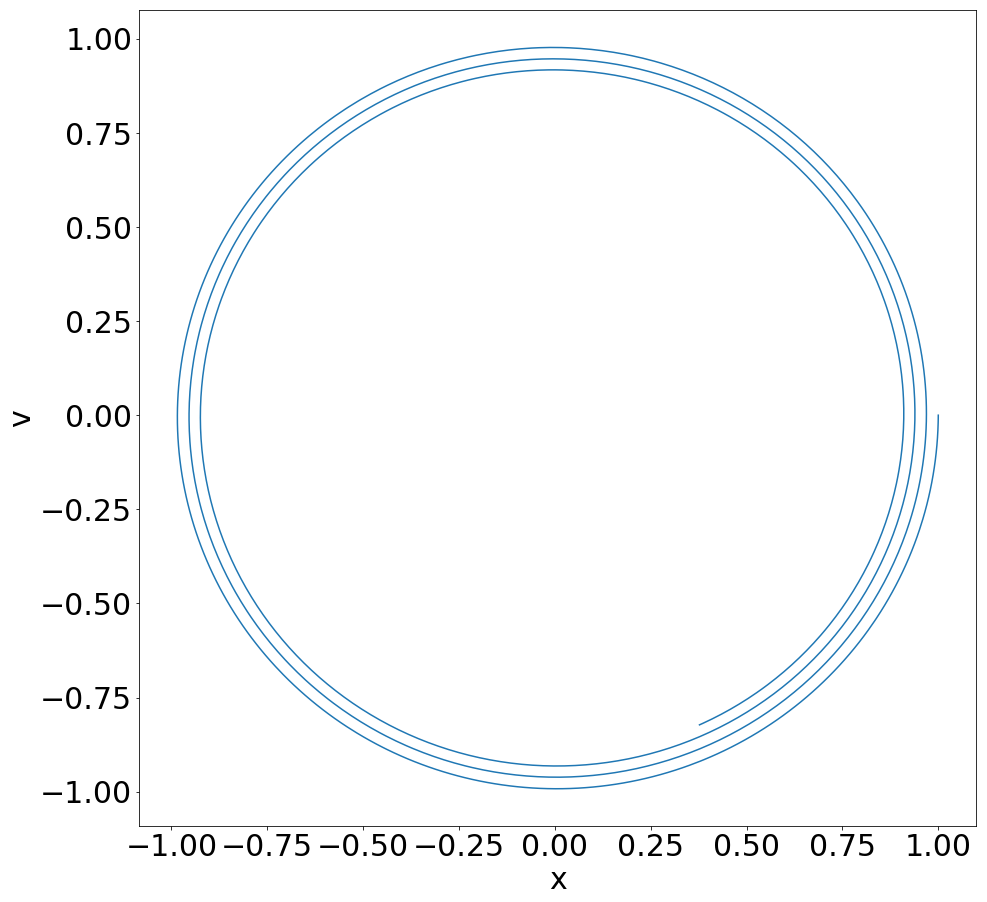

In [320]:
plt.figure(figsize=(15,15))
t = []
x_imp = []
v_imp = []
h = .01
for i in range(0, 2000):
    t.append(i * h)
    x_imp.append(implicitState(1, 0, h, 0, t[i])[0])
    v_imp.append(implicitState(1, 0, h, 0, t[i])[1])
plt.plot(x_imp, v_imp)
plt.xlabel('x')
plt.ylabel('v')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)
#Implicit Euler method

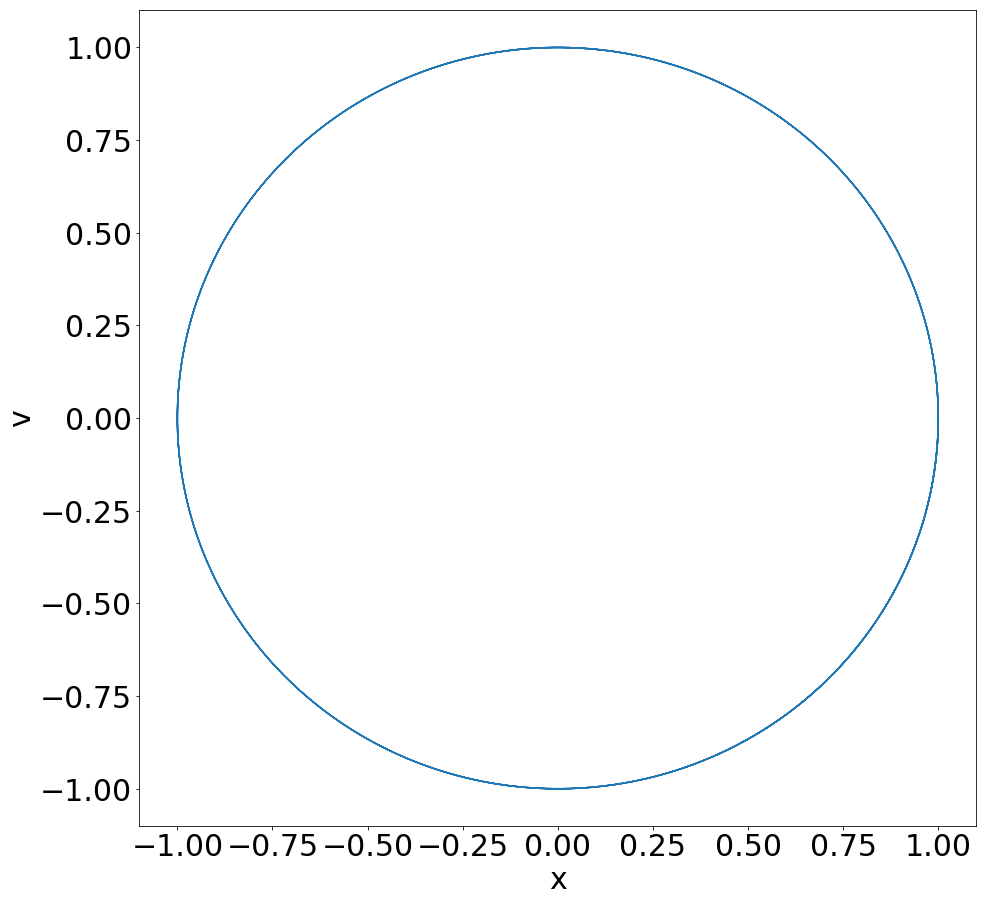

In [321]:
plt.figure(figsize=(15,15))
t = []
x_true = []
v_true = []
h = .01
for i in range(0, 2000):
    t.append(i * h)
    x_true.append(trueState(1, 0, h, 0, t[i])[0])
    v_true.append(trueState(1, 0, h, 0, t[i])[1])
plt.plot(x_true, v_true)
plt.xlabel('x')
plt.ylabel('v')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

In [242]:
def sympState(x_0, v_0, h, t_0, t):
    x = x_0
    v = v_0
    for i in range(0, int(t / h)):
        v = v - h * x
        x = x + h * v
    return [x, v]

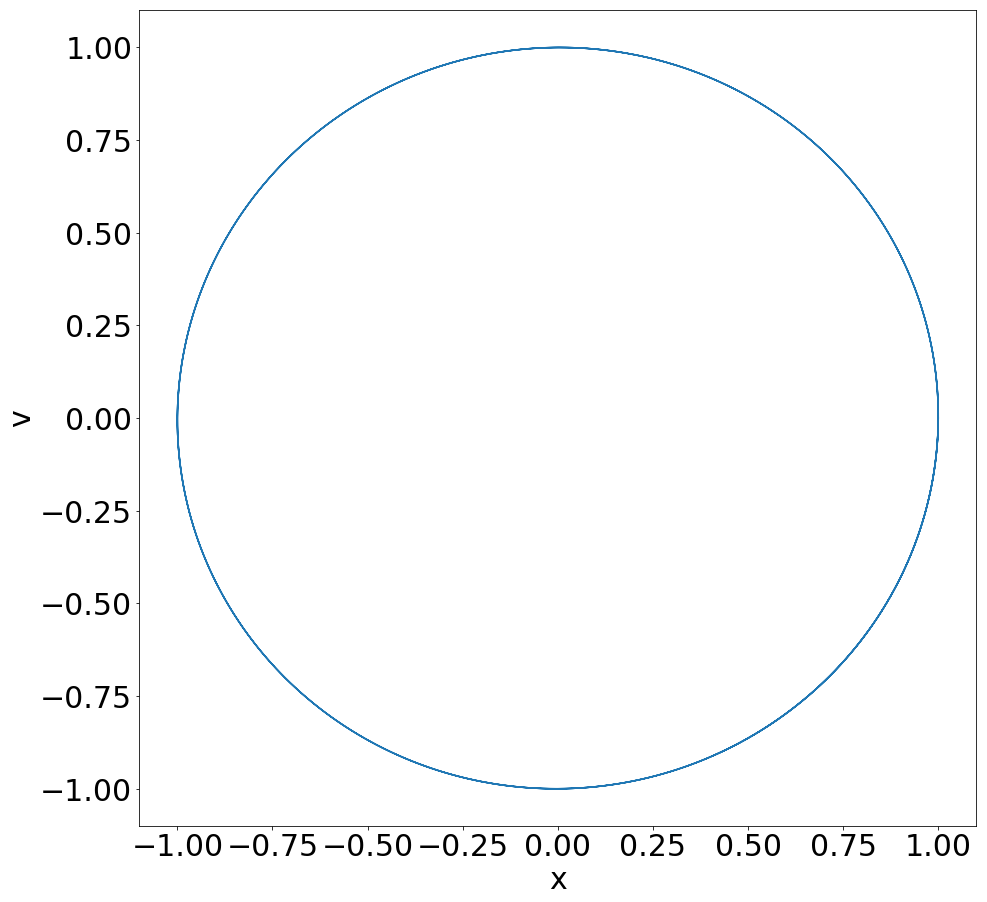

In [322]:
plt.figure(figsize=(15,15))
t = []
x_symp = []
v_symp = []
h = .01
for i in range(0, 2000):
    t.append(i * h)
    x_symp.append(sympState(1, 0, h, 0, t[i])[0])
    v_symp.append(sympState(1, 0, h, 0, t[i])[1])
plt.plot(x_symp, v_symp)
plt.xlabel('x')
plt.ylabel('v')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

In [336]:
def E_symp(x_0, v_0, h, t_0, t, sympState, trueState):
    sympState = sympState(x_0, v_0, h, t_0, t)
    trueState = trueState(x_0, v_0, h, t_0, t)
    E_symp = sympState[0] ** 2 + sympState[1] ** 2
    E_true = trueState[0] ** 2 + trueState[1] ** 2
    return [E_symp, E_true]

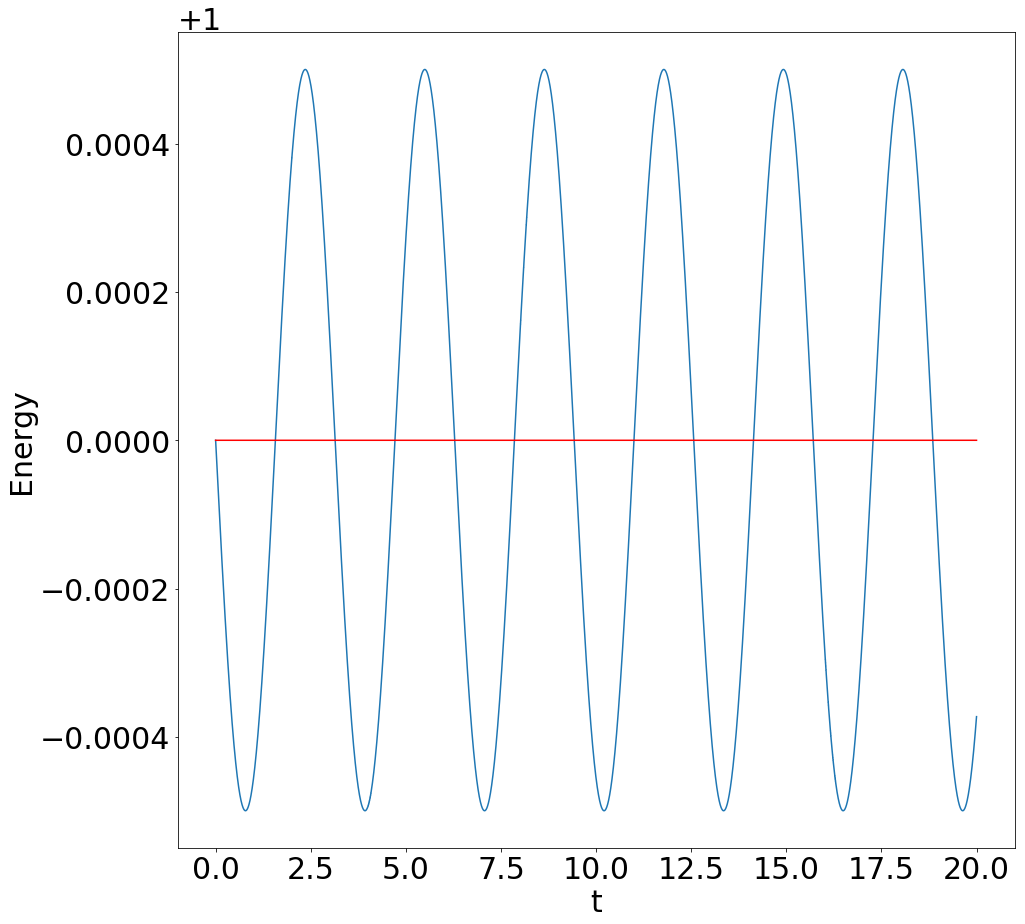

In [347]:
plt.figure(figsize=(15,15))
E_list_symp = []
E_true_list = []
t = []
h = .001
for i in range(0, 20000):
    t.append(i * h)
    E_list_symp.append(E_symp(1, 0, h, 0, t[i], sympState, trueState)[0])
    E_true_list.append(E_symp(1, 0, h, 0, t[i], sympState, trueState)[1])
plt.plot(t, E_list_symp)
plt.plot(t, E_true_list , color='red')
plt.xlabel('t')
plt.ylabel('Energy')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)


In [340]:
E_symp(1,0,.001,0,0,sympState, trueState)[1]

1.0